In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cases_dictionary = {} #Taking the data from WHO COVID.csv, only the selected columns 
US = pd.read_csv("WHO COVID.csv", usecols = ["Date_reported", " Country", " Cumulative_cases", " Cumulative_deaths"])

In [3]:
#Looping through US CSV to sort the data
for index, row in US.iterrows():
  csv_date = row[0]
  country_name = row[1]
  csv_cases = row[2]
  deaths = row[3]
  if country_name == "United States of America":
    csv_date = csv_date.split("-")[:2] #Removing the day from the date
    csv_date = "-".join(csv_date) #And then making it a string again
    cases_dictionary[csv_date] = [country_name,csv_cases,deaths]

In [4]:
#Opening the Exports and Imports Excel, then sorting the data into dictionaries
xls = pd.ExcelFile("Exports and Imports.xlsx")
exports = pd.read_excel(xls, '3', usecols = ["Unnamed: 0","Unnamed: 1"])
imports = pd.read_excel(xls, '4', usecols = ["Unnamed: 0","Unnamed: 1"])
exports_dictionary = {}
exports_visible = False #Adding a flag and a timer so we can only take data from a specific point to another
exports_timer = 0
for ex_index, ex_row in exports.iterrows(): #Looping through the exports csv and sorting the data
  exports_date = ex_row[0]
  exports_value = ex_row[1]
  if exports_visible and exports_timer < 13:
    exports_timer += 1
    exports_dictionary[exports_date] = exports_value
  if exports_date == 2020:
    exports_visible = True

imports_dictionary = {}
imports_visible = False
imports_timer = 0
for im_index, im_row in imports.iterrows():
  imports_date = im_row[0]
  imports_value = im_row[1]
  if imports_visible and imports_timer < 13:
    imports_timer += 1
    imports_dictionary[imports_date] = imports_value
  if imports_date == 2020:
    imports_visible = True

In [5]:
#Adding the Consumer Spending into a dictionary
consumers = pd.ExcelFile("Consumer Spending 2019-2020.xlsx")
cons_columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7",'August 28, 2020',"Unnamed: 9"]
cons_excel = pd.read_excel(consumers, "Table 7", usecols = cons_columns)
consumers_dictionary = {}
consumers_date = []
for i in range(len(cons_columns)): #Looping through each column of the Consumers Spending Excel and sorting the data
  for cons_index, cons_row in cons_excel.iterrows():
    if cons_index == 3:
      consumers_date = str(cons_row[i])
      if consumers_date[-1] == ".":
        consumers_date = consumers_date[:-1] #Splitting the date, so we can get only the Months
    elif cons_index == 5:
      consumers_dictionary[consumers_date.split(" ")[0]] = cons_row[i]
      consumers_date = []

In [14]:
#Opening the Unemployment rate CSV and sorting the data into a dictionary
unemployment = pd.read_csv("UnemploymentRate.csv")
unemployment_dictionary = {}
for un_index, un_row in unemployment.iterrows():
    unemployment_dictionary[un_row[0]] = un_row[1]

{'Feb 2020': 3.5, 'Mar 2020': 4.4, 'Apr 2020': 14.7, 'May 2020': 13.3, 'June 2020': 11.1, 'July 2020': 10.2, 'Aug 2020': 8.4}


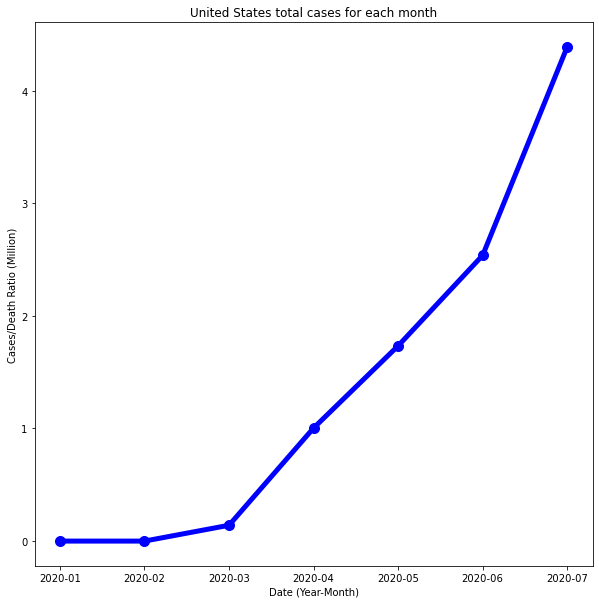

In [6]:
#United States Cases/Death Graph

plt.figure(figsize=(10,10))
plt.title("United States total cases for each month")
date = [key for key in sorted(cases_dictionary.keys())][:7]
values = [cases_dictionary[key][1]/1000000 for key in sorted(cases_dictionary.keys())][:7]
plt.ylabel("Cases/Death Ratio (Million)")
plt.xlabel("Date (Year-Month)")
plt.plot(date,values,"b.-", lw = 5, markersize=20)

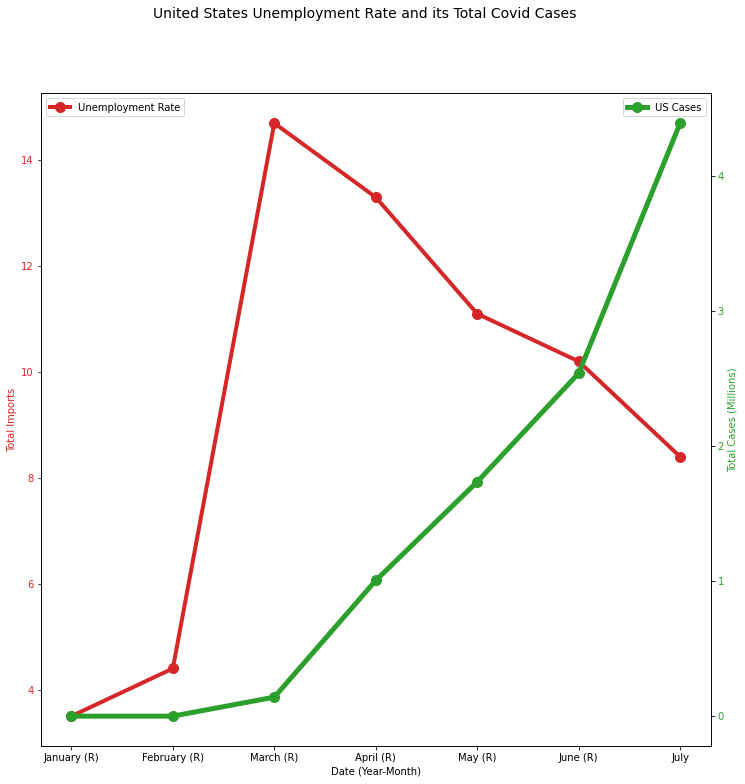

In [26]:
#United States Unemployment Rate Graph

unemployment_date = [key for key in unemployment_dictionary.keys()]
unemployment_values =[value for value in unemployment_dictionary.values()]
death_values = [cases_dictionary[key][1]/1000000 for key in sorted(cases_dictionary.keys())][:7]

unemployment_fig, unemployment_ax1 = plt.subplots()
unemployment_fig.set_figheight(12)
unemployment_fig.set_figwidth(12)
unemployment_fig.suptitle('United States Unemployment Rate and its Total Covid Cases', fontsize=14)

color = 'tab:red'
unemployment_ax1.set_ylabel('Total Imports', color = color)
unemployment_ax1.set_xlabel("Date (Year-Month)")
unemployment_ax1.tick_params(axis='y', labelcolor=color)
unemployment_ax1.plot(unemployment_date, unemployment_values, "b.-",lw=4, markersize=20, color = color, label = "Unemployment Rate")
unemployment_ax1.legend(loc = "upper left")

unemployment_ax2 = unemployment_ax1.twinx()
color = "tab:green"
unemployment_ax2.set_ylabel('Total Cases (Millions)', color = color)
unemployment_ax2.tick_params(axis='y', labelcolor=color)
unemployment_ax2.plot(date, death_values, "b.-",lw=5, markersize=20, color = color, label = "US Cases")
unemployment_ax2.legend(loc = "upper right")

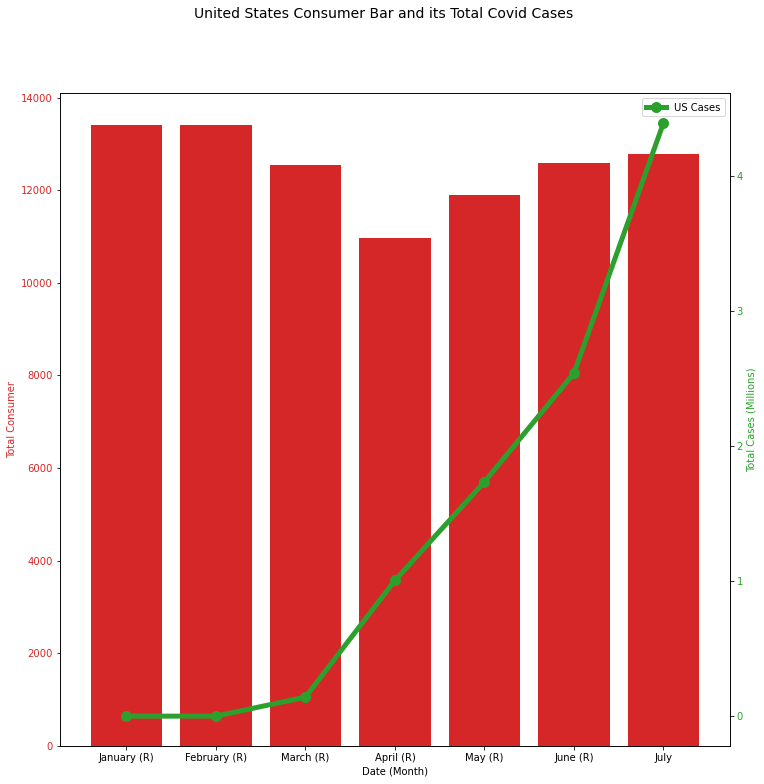

In [30]:
#United States Consumer Graph

bar_date = [key for key in consumers_dictionary.keys()][1:]
bar_values = [value for value in consumers_dictionary.values()][1:]
death_values = [cases_dictionary[key][1]/1000000 for key in sorted(cases_dictionary.keys())][:7]

bar_fig, bar_ax1 = plt.subplots()
bar_fig.set_figheight(12)
bar_fig.set_figwidth(12)
bar_fig.suptitle('United States Consumer Bar and its Total Covid Cases', fontsize=14)

color = 'tab:red'
bar_ax1.set_ylabel('Total Consumer', color = color)
bar_ax1.set_xlabel("Date (Month)")
bar_ax1.tick_params(axis='y', labelcolor=color)
bar_ax1.bar(bar_date, bar_values, color = color)

bar_ax2 = bar_ax1.twinx()
color = "tab:green"
bar_ax2.set_ylabel('Total Cases (Millions)', color = color)
bar_ax2.tick_params(axis='y', labelcolor=color)
bar_ax2.plot(date, death_values, "b.-",lw=5, markersize=20, color = color, label = "US Cases")
bar_ax2.legend(loc = "upper right")

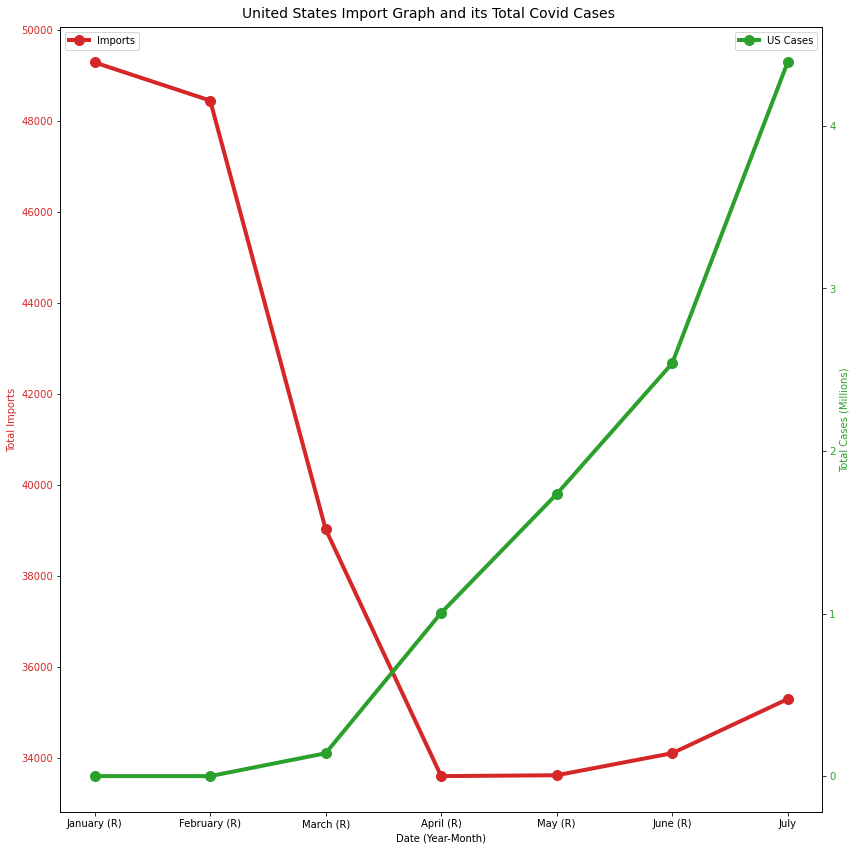

In [29]:
#United States Import Graph

import_date = [key for key in imports_dictionary.keys()][1:8]
import_values =[value for value in imports_dictionary.values()][1:8]
death_values = [cases_dictionary[key][1]/1000000 for key in sorted(cases_dictionary.keys())][:7]
import_fig, import_ax1 = plt.subplots()

import_fig.set_figheight(12)
import_fig.set_figwidth(12)
import_fig.suptitle('United States Import Graph and its Total Covid Cases', fontsize=14)

color = 'tab:red'
import_ax1.set_ylabel('Total Imports', color = color)
import_ax1.set_xlabel("Date (Year-Month)")
import_ax1.tick_params(axis='y', labelcolor=color)
import_ax1.plot(import_date, import_values, "b.-",lw=4, markersize=20, color = color, label = "Imports")
import_ax1.legend(loc = "upper left")

import_ax2 = import_ax1.twinx()
color = "tab:green"
import_ax2.set_ylabel('Total Cases (Millions)', color = color)
import_ax2.tick_params(axis='y', labelcolor=color)
import_ax2.plot(import_date, death_values, "b.-", lw=4, markersize=20, color = color, label = "US Cases")
import_ax2.legend(loc = "upper right")

import_fig.tight_layout()

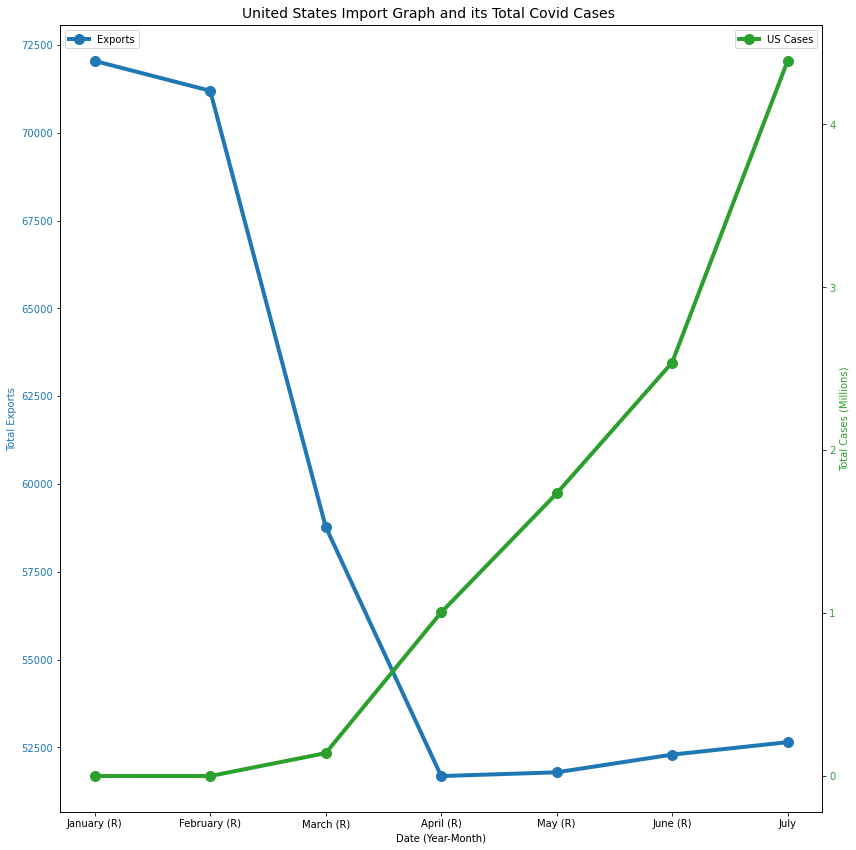

In [31]:
#United States Export Graph

export_date = [key for key in exports_dictionary.keys()][1:8]
export_values =[value for value in exports_dictionary.values()][1:8]
death_values = [cases_dictionary[key][1]/1000000 for key in sorted(cases_dictionary.keys())][:7]

export_fig, export_ax1 = plt.subplots()
export_fig.set_figheight(12)
export_fig.set_figwidth(12)
export_fig.suptitle('United States Export Graph and its Total Covid Cases', fontsize=14)

color = 'tab:blue'
export_ax1.set_ylabel('Total Exports', color = color)
export_ax1.set_xlabel("Date (Year-Month)")
export_ax1.tick_params(axis='y', labelcolor=color)
export_ax1.plot(export_date, export_values, "b.-",lw=4, markersize=20, color = color, label = "Exports")
export_ax1.legend(loc = "upper left")

export_ax2 = export_ax1.twinx()
color = "tab:green"
export_ax2.set_ylabel('Total Cases (Millions)', color = color)
export_ax2.tick_params(axis='y', labelcolor=color)
export_ax2.plot(export_date, death_values, "b.-",lw=4, markersize=20, color = color, label = "US Cases")
export_ax2.legend(loc = "upper right")

export_fig.tight_layout()